In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np




Load dataset and see shapes

In [ ]:
mnist_dataset = tf.keras.datasets.fashion_mnist.load_data()

(x_train_full, y_train_full), (x_test, y_test) = mnist_dataset

print(x_train_full.shape)
print(y_train_full.shape)
print(x_test.shape)
print(y_test.shape)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train, y_train = x_train_full[:-5000], y_train_full[:-5000]
x_validation, y_validation = x_train_full[-5000:], y_train_full[-5000:]
print(x_train.shape)
print(x_validation.shape)

(55000, 28, 28)
(5000, 28, 28)


Normalize inputs

In [ ]:
x_train, x_validation, x_test = x_train / 255.0, x_validation/ 255.0, x_test / 255.0

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Visualize data

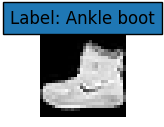

In [ ]:
for i in range(1):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {class_names[y_train[i]]}", bbox=dict(pad=5))
    plt.axis('off')

plt.show()

Build NN

In [ ]:
#tf.random.set_seed(42)

model = Sequential([
tf.keras.layers.Input(shape=[28,28]),
tf.keras.layers.Flatten(),
Dense(300, activation="relu"),
Dense(100, activation="relu"),
Dense(10, activation="softmax")])

model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), metrics=["accuracy"])

Train NN

In [ ]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_validation, y_validation))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5312 - accuracy: 0.8079 - val_loss: 0.4378 - val_accuracy: 0.8326
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3874 - accuracy: 0.8567 - val_loss: 0.4159 - val_accuracy: 0.8420
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3451 - accuracy: 0.8720 - val_loss: 0.3975 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3226 - accuracy: 0.8811 - val_loss: 0.3522 - val_accuracy: 0.8730
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3020 - accuracy: 0.8877 - val_loss: 0.3257 - val_accuracy: 0.8778
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2845 - accuracy: 0.8927 - val_loss: 0.3499 - val_accuracy: 0.8766
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2739 - accuracy: 0.8970 - val_loss: 0.3301 - val_accuracy:

Example evaluation

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3761 - accuracy: 0.8931


[0.37610477209091187, 0.8931000232696533]

In [ ]:
x_new = x_test[:3]
y_prob = model.predict(x_new)
y_prob.round(2)

y_pred = y_prob.argmax(axis=-1)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 50ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

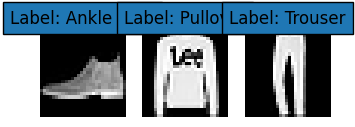

In [ ]:
for i in range(3):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_new[i], cmap='gray')
    plt.title(f"Label: {class_names[y_pred[i]]}", bbox=dict(pad=5))
    plt.axis('off')

plt.show()